In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, silhouette_score

In [9]:
# Charger le dataset Iris
fleur = datasets.load_iris()

fleur.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
fleur.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
fleur.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
fleur.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
# Création du DataFrame pour les caractéristiques
x = pd.DataFrame(data=fleur.data, columns=fleur.feature_names)
#x.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [13]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
# Création du DataFrame pour les cibles
y = pd.DataFrame(data=fleur.target, columns=["classes"])

In [15]:
y

,classes
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [17]:
# Définir les couleurs pour chaque classe cible
colorL = np.array(['green', 'blue', 'yellow'])

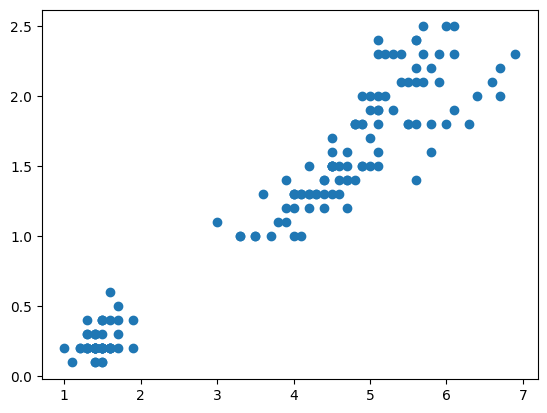

In [18]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'])

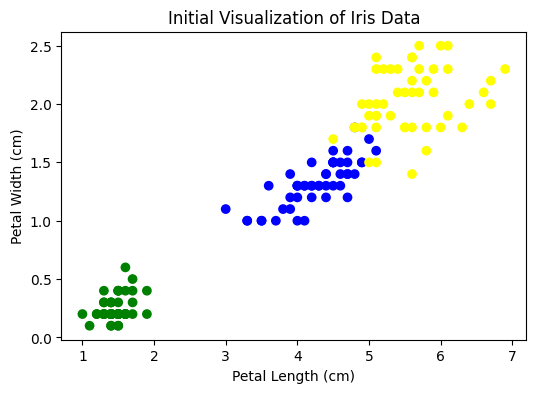

In [19]:
# Scatter plot des caractéristiques pour une visualisation initiale
plt.figure(figsize=(6, 4))
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colorL[fleur.target])
plt.title("Initial Visualization of Iris Data")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

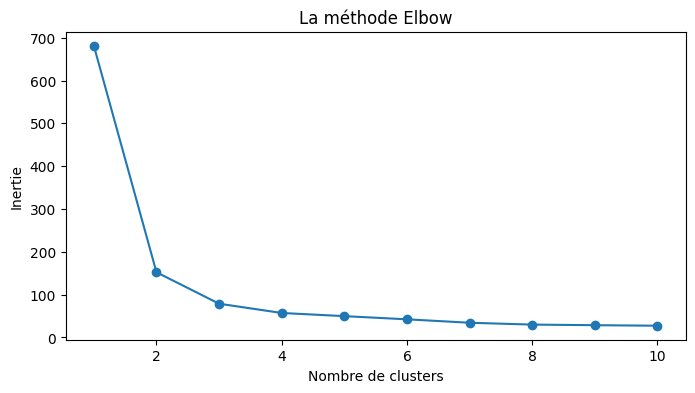

In [20]:
# Application de K-means et calcul de l'inertie pour différentes valeurs de k (Méthode Elbow)
inert = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    inert.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inert, marker='o')
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [21]:
# Application de K-means avec 3 clusters
model = KMeans(n_clusters=3, random_state=0)
model.fit(x)

KMeans(n_clusters=3, random_state=0)

In [23]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [24]:
# Prédictions de cluster pour chaque point
y_kmeans = model.predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

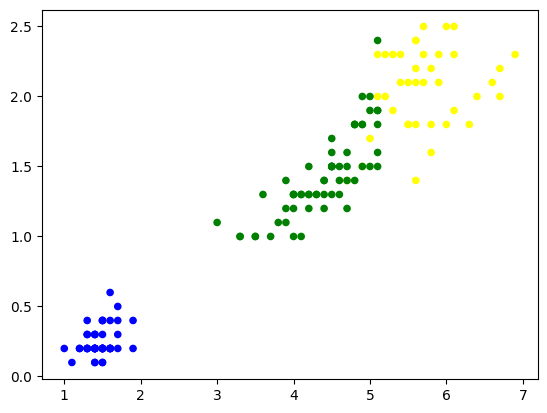

In [25]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colorL[model.labels_], s=20)

Text(0.5, 0, 'Petal Length (cm)')

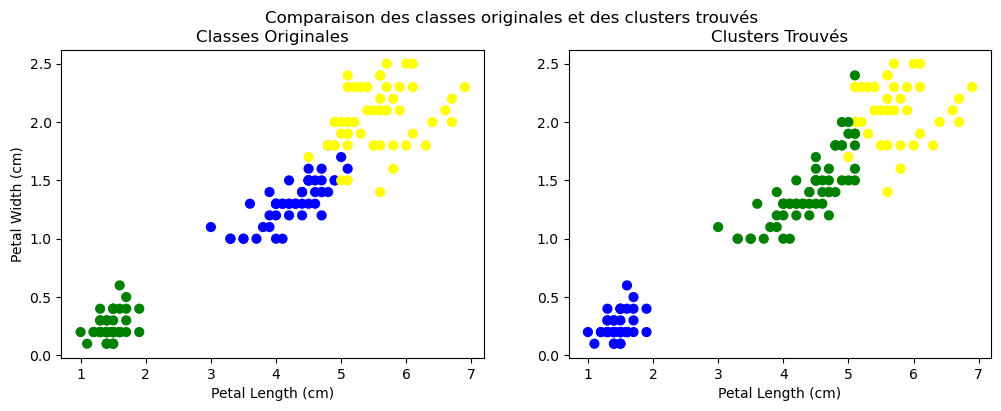

In [19]:
# Comparaison des clusters trouvés avec les classes originales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Comparaison des classes originales et des clusters trouvés")
ax1.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colorL[fleur.target], s=40)
ax1.set_title("Classes Originales")
ax1.set_xlabel('Petal Length (cm)')
ax1.set_ylabel('Petal Width (cm)')

ax2.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colorL[y_kmeans], s=40)
ax2.set_title("Clusters Trouvés")
ax2.set_xlabel('Petal Length (cm)')

In [20]:
# Matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(fleur.target, y_kmeans))

Matrice de confusion :
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [21]:
# Inertie du modèle K-means
print("Inertie (WCSS):", model.inertia_)

Inertie (WCSS): 78.85144142614601


In [22]:
# Evaluation du clustering, Calcul de l'indice de silhouette
silhouette_avg = silhouette_score(x, y_kmeans)
print("Pour n_clusters =", 3, "Le score de silhouette moyen est :", silhouette_avg)

Pour n_clusters = 3 Le score de silhouette moyen est : 0.5528190123564095


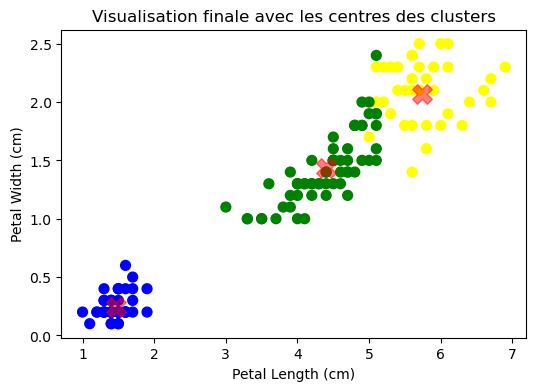

In [23]:
# Visualisation des centres des clusters
plt.figure(figsize=(6, 4))
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colorL[y_kmeans], s=50)
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.5, marker='X')  # Centres des clusters
plt.title("Visualisation finale avec les centres des clusters")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()